<a href="https://colab.research.google.com/github/chunyuan0221/3rd-ML100days/blob/master/Day_083_BatchNorm_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [0]:
import os
import keras
import itertools
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [0]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:

def build_mlp(input_shape, output_neuron=10, layer_neuron=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(shape=input_shape)
    for i, neuron in enumerate(layer_neuron):
        if i == 0:
            x = keras.layers.Dense(units=neuron, activation='relu')(input_layer)
            x = keras.layers.BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=neuron, activation='relu')(x)
            x = keras.layers.BatchNormalization()(x)

    out_layer = keras.layers.Dense(units=output_neuron, activation='softmax')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out_layer])
    return model

In [0]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [32, 128, 256] #2, 16, 
MOMENTUM = 0.95

In [0]:
#results_2 = {}
#results_16 = {}
results_32 = {}
results_128 = {}
results_256 = {}
result = [results_32, results_128, results_256] #results_2, results_16, 
result_name = ['results_32', 'results_128', 'results_256']  #'results_2', 'results_16', 

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, BATCH in enumerate(BATCH_SIZE):
    keras.backend.clear_session()
    print('Experiment batch_size=%s' %BATCH)
    model = build_mlp(x_train.shape[1:])
    opt = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    result[i]=dict(train_loss=model.history.history['loss'],
                   valid_loss=model.history.history['val_loss'],
                   train_acc=model.history.history['acc'],
                   valid_acc=model.history.history['val_acc'])
    

Experiment batch_size=32
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.7354 - acc: 0.3882 - val_loss: 1.6855 - val_acc: 0.4006
Epoch 2/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.5370 - acc: 0.4551 - val_loss: 1.5648 - val_acc: 0.4393
Epoch 3/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.4613 - acc: 0.4837 - val_loss: 1.5133 - val_acc: 0.4609
Epoch 4/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.4127 - acc: 0.4996 - val_loss: 1.6147 - val_acc: 0.4300
Epoch 5/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.3716 - acc: 0.5147 - val_loss: 1.5187 - val_acc: 0.4593
Epoch 6/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.3433 - acc: 0.5229 - val_loss: 1.4640 - val_acc: 0.4813
Epoch 7/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.3271 - a

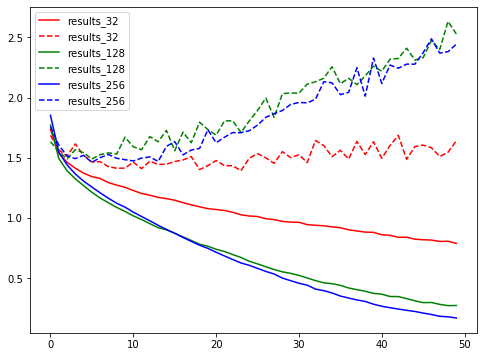

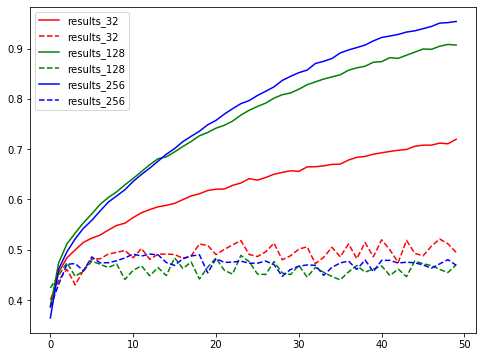

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
colorbar=['r', 'g', 'b', 'y', 'm']
plt.figure(figsize=(8, 6))
for i, name in enumerate(result_name):
    plt.plot(result[i]['train_loss'], '-', color=colorbar[i], label=name)
    plt.plot(result[i]['valid_loss'], '--', color=colorbar[i], label=name)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, name in enumerate(result_name):
    plt.plot(result[i]['train_acc'], '-', color=colorbar[i], label=name)
    plt.plot(result[i]['valid_acc'], '--', color=colorbar[i], label=name)
plt.legend()
plt.show()

### Batch Normalization位置
***
- 將keras.layers.BatchNormalization( )放到activation function前

In [0]:
def build_mlp(input_shape, output_neuron=10, layer_neuron=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(shape=input_shape)
    for i, neuron in enumerate(layer_neuron):
        if i == 0:
            x = keras.layers.BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=neuron, activation='relu')(x)
            
        else:
            x = keras.layers.BatchNormalization()(x)
            x = keras.layers.Dense(units=neuron, activation='relu')(x)
            
    out_layer = keras.layers.Dense(units=output_neuron, activation='softmax')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out_layer])
    return model

In [0]:
#results_2 = {}
#results_16 = {}
results_32 = {}
results_128 = {}
results_256 = {}
result = [results_32, results_128, results_256] #results_2, results_16, 
result_name = ['results_32', 'results_128', 'results_256']  #'results_2', 'results_16', 

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, BATCH in enumerate(BATCH_SIZE):
    keras.backend.clear_session()
    print('Experiment batch_size=%s' %BATCH)
    model = build_mlp(x_train.shape[1:])
    opt = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    result[i]=dict(train_loss=model.history.history['loss'],
                   valid_loss=model.history.history['val_loss'],
                   train_acc=model.history.history['acc'],
                   valid_acc=model.history.history['val_acc'])
    

Experiment batch_size=32
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.6785 - acc: 0.4050 - val_loss: 1.4775 - val_acc: 0.4738
Epoch 2/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.4454 - acc: 0.4855 - val_loss: 1.4079 - val_acc: 0.4936
Epoch 3/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.3440 - acc: 0.5219 - val_loss: 1.3722 - val_acc: 0.5105
Epoch 4/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.2672 - acc: 0.5512 - val_loss: 1.3453 - val_acc: 0.5208
Epoch 5/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.1988 - acc: 0.5747 - val_loss: 1.3420 - val_acc: 0.5256
Epoch 6/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.1440 - acc: 0.5944 - val_loss: 1.3052 - val_acc: 0.5392
Epoch 7/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.0938 - a

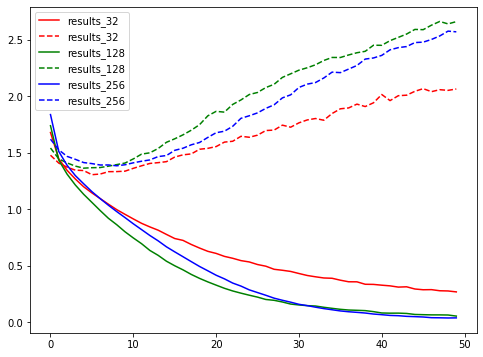

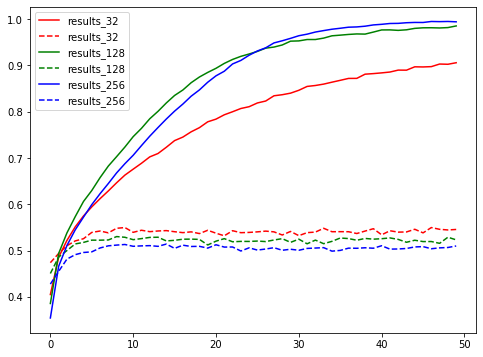

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
colorbar=['r', 'g', 'b', 'y', 'm']
plt.figure(figsize=(8, 6))
for i, name in enumerate(result_name):
    plt.plot(result[i]['train_loss'], '-', color=colorbar[i], label=name)
    plt.plot(result[i]['valid_loss'], '--', color=colorbar[i], label=name)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, name in enumerate(result_name):
    plt.plot(result[i]['train_acc'], '-', color=colorbar[i], label=name)
    plt.plot(result[i]['valid_acc'], '--', color=colorbar[i], label=name)
plt.legend()
plt.show()

### Batch Normalization位置
***
- 將keras.layers.BatchNormalization( )放到input_layer後面

In [0]:
def build_mlp(input_shape, output_neuron=10, layer_neuron=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(shape=input_shape)
    x = keras.layers.BatchNormalization()(input_layer)
    for i, neuron in enumerate(layer_neuron):
        if i == 0:
            x = keras.layers.Dense(units=neuron, activation='relu')(x)
        else:
            x = keras.layers.Dense(units=neuron, activation='relu')(x)

    out_layer = keras.layers.Dense(units=output_neuron, activation='softmax')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out_layer])
    return model

In [0]:
#results_2 = {}
#results_16 = {}
results_32 = {}
results_128 = {}
results_256 = {}
result = [results_32, results_128, results_256] #results_2, results_16, 
result_name = ['results_32', 'results_128', 'results_256']  #'results_2', 'results_16', 

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, BATCH in enumerate(BATCH_SIZE):
    keras.backend.clear_session()
    print('Experiment batch_size=%s' %BATCH)
    model = build_mlp(x_train.shape[1:])
    opt = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    result[i]=dict(train_loss=model.history.history['loss'],
                   valid_loss=model.history.history['val_loss'],
                   train_acc=model.history.history['acc'],
                   valid_acc=model.history.history['val_acc'])
    

Experiment batch_size=32
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6761 - acc: 0.4053 - val_loss: 1.5003 - val_acc: 0.4728
Epoch 2/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.4491 - acc: 0.4907 - val_loss: 1.4460 - val_acc: 0.4912
Epoch 3/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.3429 - acc: 0.5271 - val_loss: 1.3848 - val_acc: 0.5122
Epoch 4/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.2552 - acc: 0.5618 - val_loss: 1.3679 - val_acc: 0.5201
Epoch 5/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.1839 - acc: 0.5832 - val_loss: 1.3511 - val_acc: 0.5308
Epoch 6/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.1174 - acc: 0.6048 - val_loss: 1.3621 - val_acc: 0.5227
Epoch 7/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.0508 - acc: 0.6

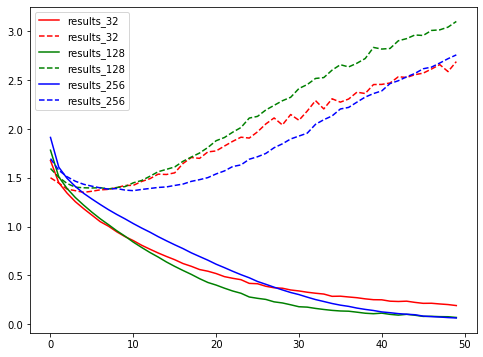

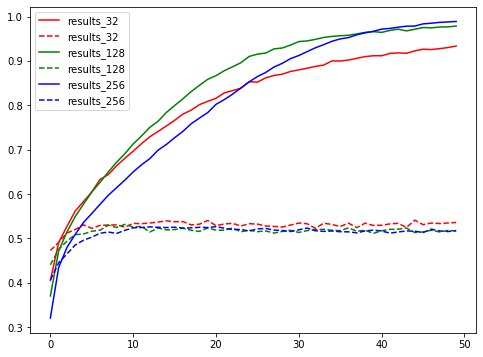

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
colorbar=['r', 'g', 'b', 'y', 'm']
plt.figure(figsize=(8, 6))
for i, name in enumerate(result_name):
    plt.plot(result[i]['train_loss'], '-', color=colorbar[i], label=name)
    plt.plot(result[i]['valid_loss'], '--', color=colorbar[i], label=name)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, name in enumerate(result_name):
    plt.plot(result[i]['train_acc'], '-', color=colorbar[i], label=name)
    plt.plot(result[i]['valid_acc'], '--', color=colorbar[i], label=name)
plt.legend()
plt.show()

### 問題
***
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

### Result
***
- 由於在有限的電腦資源下，我只採取 Batch_size = 32, 128, 256 進行模擬測試。  
    1. 將BN放在每個隱藏層的Activation之後的Loss:

![alt text](https://drive.google.com/uc?id=14MLBTAxJSrekjkdVFeTg3TsSRAoAnDdU)

    2. 將BN放在每個隱藏層的Activation之前的Loss:14MLBTAxJSrekjkdVFeTg3TsSRAoAnDdU

![alt text](https://drive.google.com/uc?id=1lRHob-VnXvXl9c1VpfAKwE8Ng3_oGaOq)

    3. 將BN放在Input Layer之後的Loss:

![alt text](https://drive.google.com/uc?id=1F7vZKQNqNIerEUNek7pTwLjg2oaBHo5a)

- 將上述前3點比較後，我們發現在只要在進入第1層hidden layer前，先做Batch normalize，驗證的結果會比較平滑穩定(第2、3點)
- 此外，不僅在進入第1層hidden layer前，先做Batch normalize；我們在每一層hidden layer都做Batch normalize，驗證結果的Loss能再往下降。